In [3]:
import spacy
from tqdm.auto import tqdm
from spacy.tokens import DocBin
from ml_datasets import imdb
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import pymorphy2

import pandas as pd
import pymorphy2

from tqdm import tqdm
tqdm.pandas()

import nltk
from nltk.tokenize import word_tokenize 
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from gensim.models import Phrases

In [24]:
df = pd.read_csv("./women-clothing-accessories.3-class.balanced.csv", delimiter='\t')
# фильтруем создаем новый DataFrame, который содержит только те строки из df, 
df = df[df['sentiment'] != 'neautral']
# убрали знаки препинания
df['review_processed'] = df['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x)).values
# привели к нижнему регистру
df['review_processed'] = df['review_processed'].apply(lambda x: x.lower())
# разабъем слова
df['review_processed'] = df['review_processed'].apply(lambda x: word_tokenize(x))

In [25]:
# Создайте TF-IDF векторизатор (числовые признаки)
morph = pymorphy2.MorphAnalyzer()

In [26]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                    #  vector_size=3000,  # Use vector_size instead of size
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)

In [27]:
# что то
sent = df['review_processed'].values
w2v_model.build_vocab(sent, progress_per=1000)
w2v_model.train(sent, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(12174914, 35884950)

In [28]:
w2v_model.wv.most_similar('ужасный') # ищим близкие слова

[('отвратительный', 0.7720617055892944),
 ('плохой', 0.6355962157249451),
 ('жуткий', 0.6117358803749084),
 ('непонятный', 0.5291527509689331),
 ('химический', 0.5264956951141357),
 ('ужас', 0.473844438791275),
 ('неприятный', 0.46854671835899353),
 ('вонь', 0.4644334316253662),
 ('странный', 0.4619321823120117),
 ('некачественный', 0.4480910003185272)]

In [30]:
from scipy.spatial.distance import cosine
print('растояние векторов между слвоами')
cosine(w2v_model.wv['хороший'], w2v_model.wv['плохой'])

растояние векторов между слвоами


0.4716495871543884

# CatBoost важно полезно молодежно

https://catboost.ai/

In [36]:
# ! pip install catboost

In [1]:
import catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'catboost'

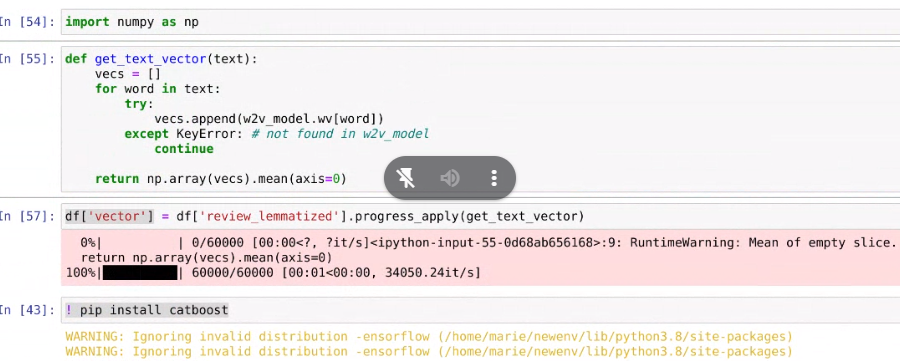